In [1]:
import sys;
sys.path.append('../../')
from definitions import *
from notebooks.nb_imports import *

In [2]:
from src.experiments.extractors import ExperimentToFrame
from src.visualization.critial_difference import plot_cd_diagram

# Depth Experiments

## Time Augmentation Only

In [3]:
df = ExperimentToFrame(ex_dir=MODELS_DIR + '/experiments/basic_order').generate_frame()
df['tfms'] = df['tfms'].apply(str)

In [4]:
df.drop('cv_params', axis=1).iloc[0:10]

,ds_name,acc.mean,acc.original_split,acc.std,clf_key,depth,interval,logsig,metrics,multivariate,num_features,tfms
1,ACSF1,0.414124,0.480000,0.056284,rf,1,False,False,(acc),False,2.0,['leadlag']
2,ACSF1,0.417132,0.480000,0.057034,rf,1,False,True,(acc),False,2.0,['leadlag']
3,Adiac,0.134427,0.130435,0.010332,rf,1,False,False,(acc),False,2.0,['leadlag']
4,Adiac,0.134426,0.130435,0.010023,rf,1,False,True,(acc),False,2.0,['leadlag']
5,ArrowHead,0.415392,0.457143,0.041987,rf,1,False,False,(acc),False,2.0,['leadlag']
6,ArrowHead,0.415392,0.457143,0.041987,rf,1,False,True,(acc),False,2.0,['leadlag']
7,Beef,0.385000,0.400000,0.080777,rf,1,False,False,(acc),False,2.0,['leadlag']
8,Beef,0.385000,0.400000,0.080777,rf,1,False,True,(acc),False,2.0,['leadlag']
9,BeetleFly,0.558791,0.500000,0.101524,rf,1,False,False,(acc),False,2.0,['leadlag']
10,BeetleFly,0.551648,0.500000,0.102887,rf,1,False,True,(acc),False,2.0,['leadlag']


### CD diagram

In [5]:
df_new = df[['ds_name', 'depth', 'acc.mean']][df['logsig'] == False].set_index('ds_name').pivot(columns='depth')

In [7]:
df_new

depth,1,2,3,4
ds_name,,,,
ACSF1,0.414124,0.577214,0.699941,0.723397
Adiac,0.134427,0.345283,0.462700,0.480474
ArrowHead,0.415392,0.609851,0.657143,0.674837
Beef,0.385000,0.470000,0.496667,0.528333
BeetleFly,0.558791,0.759066,0.835934,0.816648
Coffee,0.456140,0.884545,0.903906,0.903906
Crop,0.144935,0.349908,0.472252,0.545032


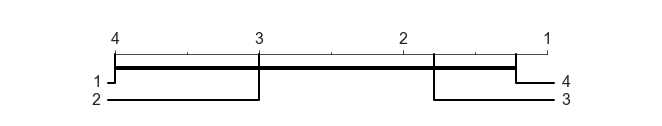

In [6]:
# df_new = df[['ds_name', 'logsig', 'acc.mean']].set_index('ds_name').pivot(columns='logsig')
df_new.columns = df_new.columns.droplevel(0)
plot_cd_diagram(df_new);

In [22]:
# Plot avg accuracy across all datasets as we increase time
averaged = get_averaged_groupby(df, 'logsig', 'acc.mean')
print(averaged)

logsig
False    0.560923
True     0.559908
Name: acc.mean, dtype: float64


Lets look at Basic motions for different orders

In [6]:
wins = get_num_wins(df, metric='acc.mean', column='depth')
print(wins)

4    7
dtype: int64
